In [1]:
import pandas as pd
import datetime

In [2]:
intraday = pd.DataFrame(columns=['date', 'price'])

In [3]:
with open("additional_data/4_aapl.txt", "r") as stock:
    for idx, line in enumerate(stock):
        el = line.split(" ")[0]+" "+ line.split(" ")[1]
        data = datetime.datetime.strptime(line.split(" ")[0]+" "+ line.split(" ")[1], '%Y-%m-%d %H:%M:%S')
        intraday.loc[idx] = pd.Series({'date': data, 'price': float(line.split(" ")[-1].strip())})

In [28]:
intraday.head()

,date,price
0,2016-01-04 09:45:00,100.021
1,2016-01-04 09:46:00,100.129
2,2016-01-04 09:47:00,100.399
3,2016-01-04 09:48:00,100.286
4,2016-01-04 09:49:00,100.343


Populating the interactive namespace from numpy and matplotlib


/home/ostapkharysh/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['split']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


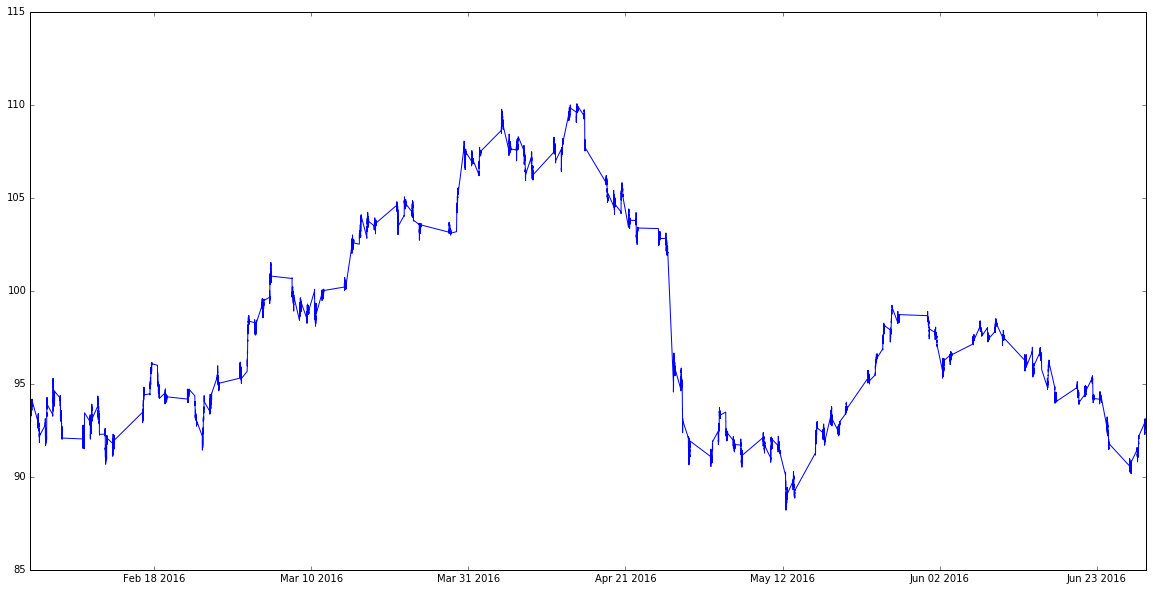

In [86]:
import matplotlib.pyplot as plt
import matplotlib
# necessary for the plot to appear in a Jupyter
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

period_df = intraday[(intraday['date'] >= '2016-02-01') & (intraday['date'] < '2016-06-30')]

plt.plot(period_df['date'], period_df['price'])
# beautify the x-labels
#plt.gcf().autofmt_xdate()

plt.show()

In [87]:
period_df.tail()

,date,price
44759,2016-06-29 15:41:00,93.0184
44760,2016-06-29 15:42:00,93.0431
44761,2016-06-29 15:43:00,92.9988
44762,2016-06-29 15:44:00,93.0234
44763,2016-06-29 15:45:00,93.0283


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import adfuller, acf, pacf

### Dicky-Fuller Test for 'period_df' (now 6 months)

In [89]:
dicky_fuller_test = adfuller(period_df['price'])
dicky_fuller_test

(-1.315879413444822,
 0.62187651389080745,
 0,
 37904,
 {'1%': -3.4305225343739689,
  '10%': -2.5668105887006192,
  '5%': -2.8616162561136327},
 -86723.829109499231)

In [90]:
"The Dicky-Fuller shows p-value: {} % that the process is non-stationar , lags used: {}".format(round(dicky_fuller_test[1], 2), dicky_fuller_test[2])

'The Dicky-Fuller shows p-value: 0.62 % that the process is non-stationar , lags used: 0'

## Solving unstationarity

### Differencing

In [91]:
diff_period_df = period_df['price'].diff()
diff_period_df = diff_period_df.dropna()

In [92]:
dicky_fuller_test = adfuller(diff_period_df)
dicky_fuller_test

(-195.92846601118032,
 0.0,
 0,
 37903,
 {'1%': -3.430522538926275,
  '10%': -2.5668105897715279,
  '5%': -2.8616162581255855},
 -86720.43184500435)

In [93]:
"The Dicky-Fuller test p-value result: {} , lags used: {}".format(round(dicky_fuller_test[1], 2), dicky_fuller_test[2])

'The Dicky-Fuller test p-value result: 0.0 , lags used: 0'

### Log Differencing

In [94]:
log_price = np.log(period_df['price'])
dicky_fuller_test = adfuller(log_price)
dicky_fuller_test

(-1.3358800939713646,
 0.61260151893937276,
 0,
 37904,
 {'1%': -3.4305225343739689,
  '10%': -2.5668105887006192,
  '5%': -2.8616162561136327},
 -433561.37188465684)

In [95]:
"The Dicky-Fuller shows p-value: {} % that the process is non-stationar , lags used: {}".format(round(dicky_fuller_test[1], 2), dicky_fuller_test[2])

'The Dicky-Fuller shows p-value: 0.61 % that the process is non-stationar , lags used: 0'

In [96]:
log_diff_period_df = log_price.diff()
log_diff_period_df = log_diff_period_df.dropna()

In [97]:
dicky_fuller_test = adfuller(log_diff_period_df)
dicky_fuller_test

(-195.93291327420533,
 0.0,
 0,
 37903,
 {'1%': -3.430522538926275,
  '10%': -2.5668105897715279,
  '5%': -2.8616162581255855},
 -433548.77748241898)

In [98]:
"The Dicky-Fuller shows p-value: {} % that the process is non-stationar , lags used: {}".format(round(dicky_fuller_test[1], 2), dicky_fuller_test[2])

'The Dicky-Fuller shows p-value: 0.0 % that the process is non-stationar , lags used: 0'

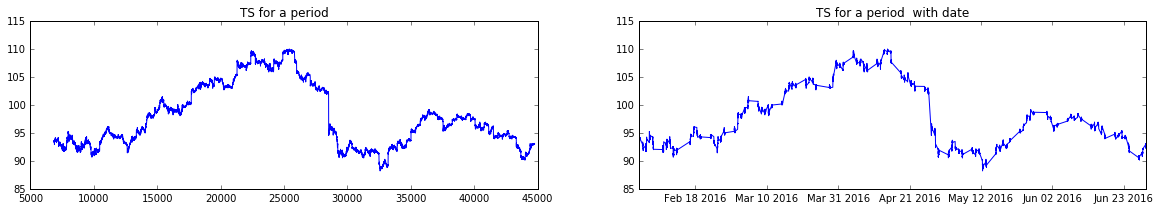

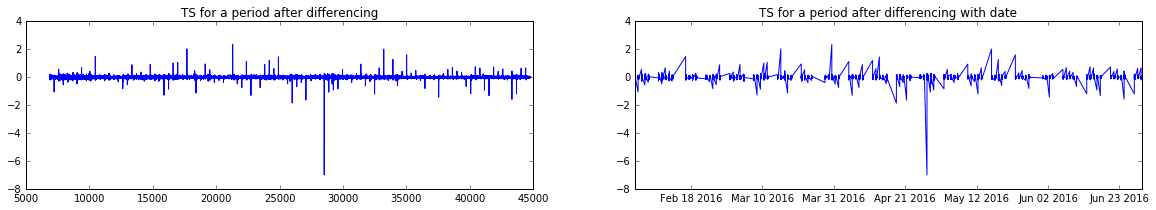

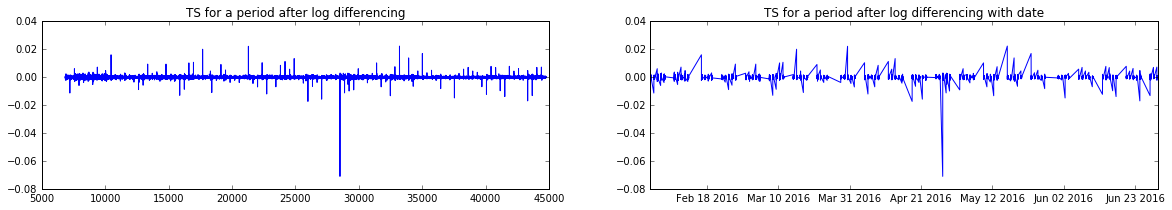

In [99]:
#period_df.drop(period_df.index[0], inplace=True) # make consistent after price difference
pylab.rcParams['figure.figsize'] = (20, 3) 

plt.figure(1)
plt.subplot(121)
plt.title("TS for a period")
plt.plot(period_df['price'])

plt.subplot(122)
plt.title("TS for a period  with date")
plt.plot(period_df['date'], period_df['price'])



plt.figure(2)
plt.subplot(121)
plt.title("TS for a period after differencing")
plt.plot(diff_period_df)

plt.subplot(122)
plt.title("TS for a period after differencing with date")
plt.plot(period_df['date'][1:], diff_period_df)



plt.figure(3)
plt.subplot(121)
plt.title("TS for a period after log differencing")
plt.plot(log_diff_period_df)

plt.subplot(122)
plt.title("TS for a period after log differencing with date")
plt.plot(period_df['date'][1:], log_diff_period_df)


# EXPERIMENTAL .... 

### AUTOCORELATION FUNCTION

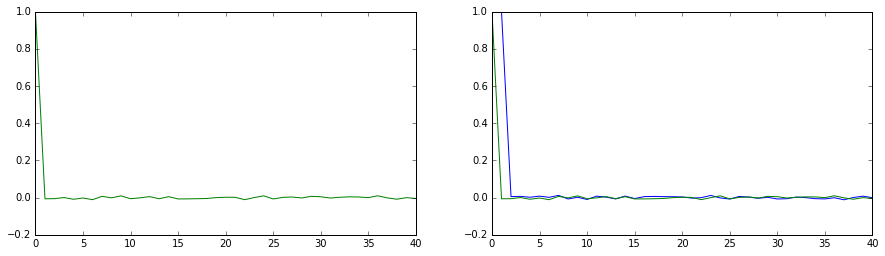

In [100]:
pylab.rcParams['figure.figsize'] = (15, 4) 

plt.figure(1)
plt.subplot(121)
plt.plot(acf(period_df['price']))
plt.plot(acf(diff_period_df))


plt.subplot(122)
plt.plot(pacf(period_df['price']))
plt.plot(pacf(diff_period_df))

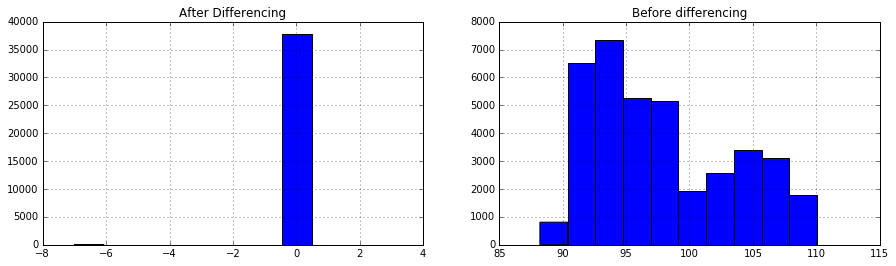

mean1.1 = 0.000844, mean1.2 = -0.000872                     mean2.1 = 100.013486, mean2.2 = 95.749851
variance1.1 = 0.005034, variance1.2 = 0.006809             variance2.1 = 34.631292, variance2.2 = 18.341941


In [101]:
plt.figure(1)
plt.subplot(121)
plt.title("After Differencing")
diff_period_df.hist()

plt.subplot(122)
plt.title("Before differencing")
period_df['price'].hist()
plt.show()

split = len(diff_period_df) // 2
X1, X2 = diff_period_df[0:split], diff_period_df[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

split2 = len(period_df) // 2
X21, X22 = period_df['price'][0:split2], period_df['price'][split2:]
mean21, mean22 = X21.mean(), X22.mean()
var21, var22 = X21.var(), X22.var()


print('mean1.1 = %f, mean1.2 = %f' % (mean1, mean2) + '                     mean2.1 = %f, mean2.2 = %f' % (mean21, mean22))
print('variance1.1 = %3f, variance1.2 = %f' % (var1, var2) + '             variance2.1 = %f, variance2.2 = %f' % (var21, var22))


